In [7]:
import random
import numpy as np
import importlib
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os
os.chdir('C:/Users/Pierre Lavigne/Dropbox/Etude de Cas M2/Scripts') #Select your working directory
cwd = os.getcwd()
F=importlib.import_module("Functions")
F=importlib.reload(F)


(X_train, train_label) = F.load_pickled_data("C:/Users/Pierre Lavigne/Desktop/data/train.p", ['features', 'labels'])
(X_test, test_label) = F.load_pickled_data("C:/Users/Pierre Lavigne/Desktop/data/test.p", ['features', 'labels'])
X_train = X_train/255.
X_test = X_test/255.

x_train = X_train[:1000]
train_label = train_label[:1000]

x_test = X_test[test_label == 41]
x_test = np.append(x_test,X_test[test_label == 31],axis=0)
x_test = np.append(x_test,X_test[test_label == 36],axis=0)

y_test = test_label[test_label == 41]
y_test = np.append(y_test,test_label[test_label == 31],axis =0)
y_test = np.append(y_test,test_label[test_label == 36],axis =0)

(x_train,train_label) = F.increase_data(x_train,5,train_label)
(x_test,test_label) = F.increase_data(x_test,5,y_test)


(x_train,train_label) = F.flip_extend(x_train,train_label)
(x_test,test_label) = F.flip_extend(x_test,test_label)

x_train_noisy = F.sqr_noise(x_train,(5,25),(5,25),3)
x_train=F.preprocess_dataset_new(x_train)
x_train_noisy=F.preprocess_dataset_new(x_train_noisy)

x_test_noisy = F.sqr_noise(x_test,(5,25),(5,25),3)
x_test=F.preprocess_dataset_new(x_test)
x_test_noisy=F.preprocess_dataset_new(x_test_noisy)

x_test = x_test.astype('float32') 
x_train = x_train.astype('float32') 
x_test_noisy = x_test_noisy.astype('float32') 
x_train_noisy = x_train_noisy.astype('float32') 


x_train = np.reshape(x_train, (len(x_train), 32, 32, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 1))  # adapt this if using `channels_first` image data format
x_train_noisy = np.reshape(x_train_noisy, (len(x_train), 32, 32, 1))  # adapt this if using `channels_first` image data format
x_test_noisy = np.reshape(x_test_noisy, (len(x_test), 32, 32, 1))  # adapt this if using `channels_first` image data format

target_train = to_categorical(train_label)
target_test=to_categorical(test_label)



0.0 % de progression
10.0 % de progression
20.0 % de progression
30.0 % de progression
40.0 % de progression
50.0 % de progression
60.0 % de progression
70.0 % de progression
80.0 % de progression
90.0 % de progression
0.0 % de progression
22.22222222222222 % de progression
44.44444444444444 % de progression
66.66666666666666 % de progression
88.88888888888889 % de progression


C:\Users\Pierre Lavigne\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [8]:
x_train = np.append(x_train,x_train_noisy,axis = 0)
x_test = np.append(x_test,x_test_noisy,axis = 0)
target_train = np.append(target_train,target_train,axis = 0)
target_test = np.append(target_test,target_test,axis = 0)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

input_shape=x_train[1].shape
                   
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(target_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


model.fit(x_train,target_train,
          epochs=20,
          validation_data=(x_test, target_test),
          callbacks=[early_stopping_monitor])

Train on 24200 samples, validate on 12540 samples
Epoch 1/20
24200/24200 [==============================] - 76s 3ms/step - loss: 0.2721 - acc: 0.9172 - val_loss: 0.2459 - val_acc: 0.9126
Epoch 2/20
24200/24200 [==============================] - 78s 3ms/step - loss: 0.0851 - acc: 0.9721 - val_loss: 0.1754 - val_acc: 0.9384
Epoch 3/20
24200/24200 [==============================] - 77s 3ms/step - loss: 0.0560 - acc: 0.9807 - val_loss: 0.1201 - val_acc: 0.9560
Epoch 4/20
24200/24200 [==============================] - 78s 3ms/step - loss: 0.0389 - acc: 0.9866 - val_loss: 0.1334 - val_acc: 0.9537
Epoch 5/20
24200/24200 [==============================] - 78s 3ms/step - loss: 0.0284 - acc: 0.9908 - val_loss: 0.1822 - val_acc: 0.9490


In [10]:
model.evaluate(x_test,target_test)

12540/12540 [==============================] - 9s 755us/step


[0.18224373879538117, 0.9489633173273321]

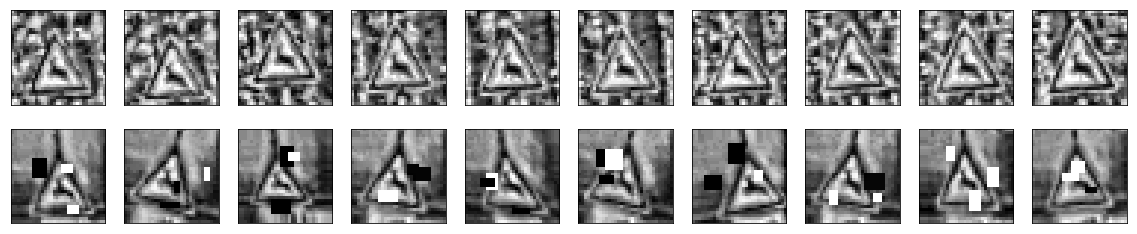

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i+100].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(x_train[i+15000].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()